In [10]:
#import libraries
import pandas as pd
import numpy as np
import random as rd
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv('c:\\Users\\vaishnavi\\Downloads\\Mall_Customers.csv',usecols = ['CustomerID', 'Annual Income (k$)', 'Spending Score (1-100)'])
df.head()

,CustomerID,Annual Income (k$),Spending Score (1-100)
0,1,15,39
1,2,15,81
2,3,16,6
3,4,16,77
4,5,17,40


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              200 non-null    int64
 1   Annual Income (k$)      200 non-null    int64
 2   Spending Score (1-100)  200 non-null    int64
dtypes: int64(3)
memory usage: 4.8 KB


<Axes: xlabel='CustomerID', ylabel='Annual Income (k$)'>

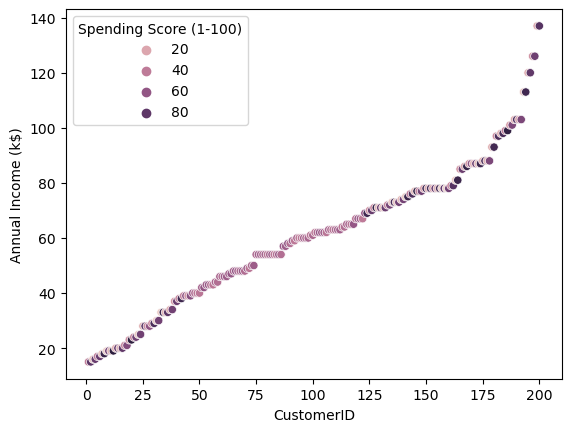

In [15]:
sns.scatterplot(data = df, x = 'CustomerID', y = 'Annual Income (k$)', hue = 'Spending Score (1-100)')

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[['CustomerID', 'Annual Income (k$)']], df[['Spending Score (1-100)']], test_size=0.33, random_state=0)

In [17]:
from sklearn import preprocessing

X_train_norm = preprocessing.normalize(X_train)
X_test_norm = preprocessing.normalize(X_test)

In [19]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0, n_init='auto')
kmeans.fit(X_train_norm)

c:\Users\vaishnavi\.anaconda2\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, n_init='auto', random_state=0)

<Axes: xlabel='CustomerID', ylabel='Annual Income (k$)'>

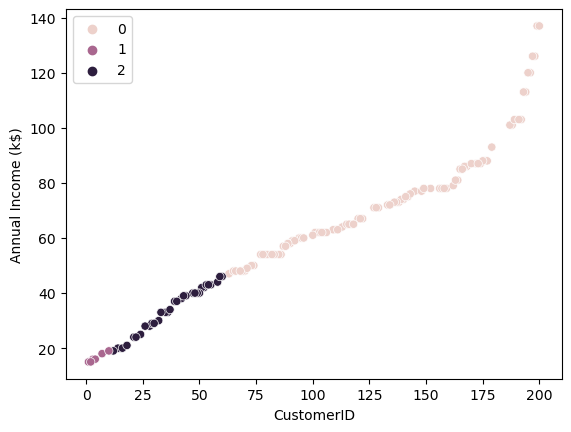

In [20]:
sns.scatterplot(data = X_train, x = 'CustomerID', y = 'Annual Income (k$)', hue = kmeans.labels_)

<Axes: ylabel='Spending Score (1-100)'>

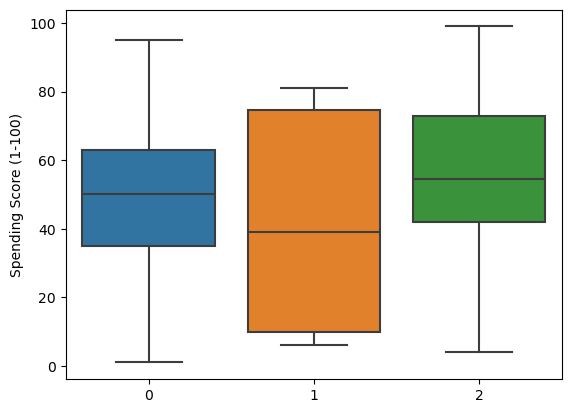

In [21]:
sns.boxplot(x = kmeans.labels_, y = y_train['Spending Score (1-100)'])

In [22]:
from sklearn.metrics import silhouette_score

silhouette_score(X_train_norm, kmeans.labels_, metric='euclidean')

0.6622165177957161

In [23]:
K = range(2, 8)
fits = []
score = []


for k in K:
    # train the model for current value of k on training data
    model = KMeans(n_clusters = k, random_state = 0, n_init='auto').fit(X_train_norm)
    
    # append the model to fits
    fits.append(model)
    
    # Append the silhouette score to scores
    score.append(silhouette_score(X_train_norm, model.labels_, metric='euclidean'))

c:\Users\vaishnavi\.anaconda2\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\vaishnavi\.anaconda2\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\vaishnavi\.anaconda2\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\vaishnavi\.anaconda2\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a m

<Axes: xlabel='CustomerID', ylabel='Annual Income (k$)'>

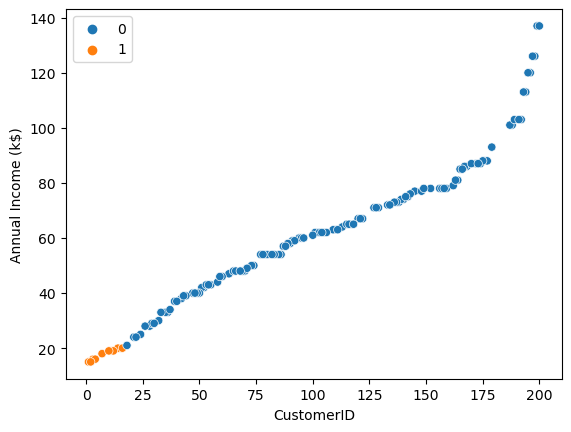

In [24]:
sns.scatterplot(data = X_train, x = 'CustomerID', y = 'Annual Income (k$)', hue = fits[0].labels_)

<Axes: xlabel='CustomerID', ylabel='Annual Income (k$)'>

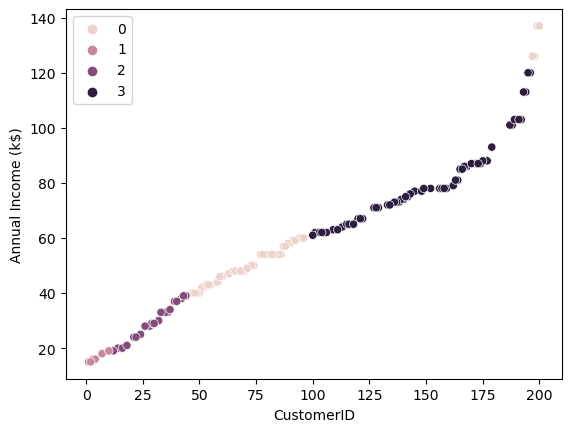

In [25]:
sns.scatterplot(data = X_train, x = 'CustomerID', y = 'Annual Income (k$)', hue = fits[2].labels_)

c:\Users\vaishnavi\.anaconda2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\vaishnavi\.anaconda2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: >

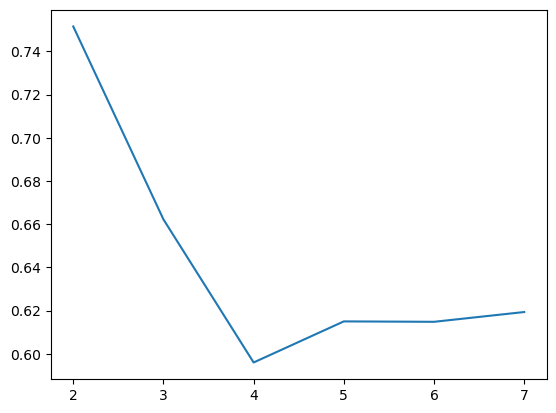

In [26]:
sns.lineplot(x = K, y = score)

<Axes: xlabel='CustomerID', ylabel='Annual Income (k$)'>

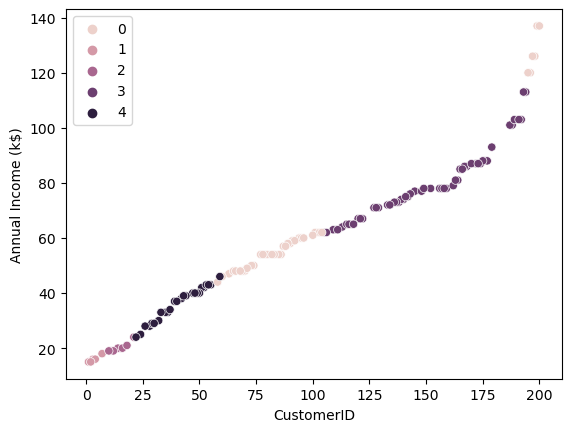

In [27]:
sns.scatterplot(data = X_train, x = 'CustomerID', y = 'Annual Income (k$)', hue = fits[3].labels_)

<Axes: ylabel='Spending Score (1-100)'>

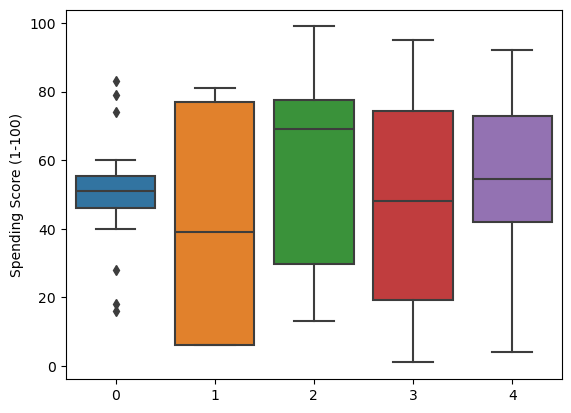

In [28]:
sns.boxplot(x = fits[3].labels_, y = y_train['Spending Score (1-100)'])